In [1]:
import numpy as np
import h5py
import hdf5plugin
import MAS_library as MASL
import Pk_library as PKL
import mass_function_library as MFL
import matplotlib.pylab as plt

import readgadget
import readfof, readsubf
import sys, os, glob
sys.path.append('/home/jovyan/home/Quijote-Hydro-PNG/')
from utils import *
# import yt
import shutil

In [5]:
# f_snap = '/home/jovyan/TNG_L50_1P_fNL/1P_LC_0_50/groups_090/fof_subhalo_tab_090.0.hdf5'

In [90]:
# input files
snapdir = '/home/jovyan/TNG_L50_1P_fNL/1P_LC_0_50/' #folder hosting the catalogue
snapnum = 90   

k, Pk, _, _ = compute_halo_Pk_from_halo_catalog(snapdir, snapnum, threshold=1e10, W=False, verbose=False)

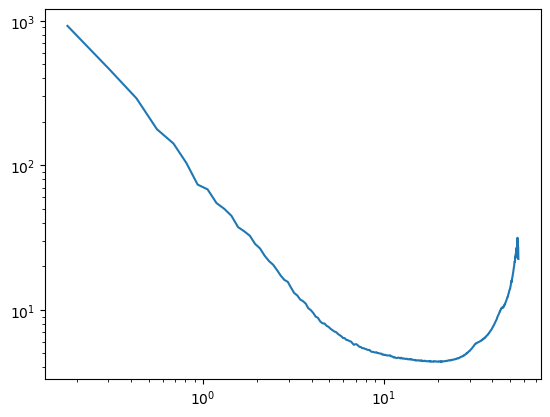

In [91]:
plt.loglog(k,Pk)

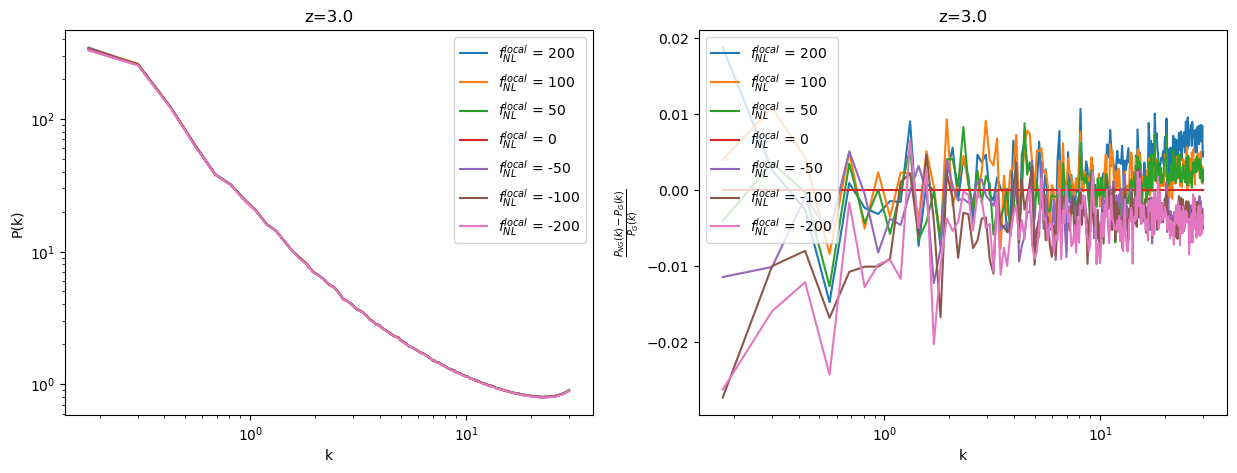

In [3]:
plot_halo_Pk(snaptype='LC', snapnum=32, kmax=30, verbose=False)

In [69]:
# input files
snapdir = '/home/jovyan/TNG_L50_1P_fNL/1P_LC_0_50/' #folder hosting the catalogue
snapnum = 90    
# catalog name
catalog = snapdir+'groups_'+str(snapnum).zfill(3)+'/fof_subhalo_tab_'+str(snapnum).zfill(3)+'.0.hdf5'

# value of the scale factor
scale_factor = np.loadtxt("../times_extended.txt")[snapnum]

# open the catalogue
f = h5py.File(catalog, 'r')

# read the positions, velocities and masses of the FoF halos
pos_h  = f['Group/GroupPos'][:]/1e3           #positions in Mpc/h
vel_h  = f['Group/GroupVel'][:]/scale_factor  #velocities in km/s
mass_h = f['Group/GroupMass'][:]*1e10         #masses in Msun/h

# read the positions, black hole masses and stellar masses of the subhalos/galaxies
pos_g  = f['Subhalo/SubhaloPos'][:]/1e3        #positions in Mpc/h
BH_g   = f['Subhalo/SubhaloBHMass'][:]*1e10     #black-hole masses in Msun/h
M_star = f['Subhalo/SubhaloMassType'][:,4]*1e10 #stellar masses in Msun/h

# close file
f.close()

In [17]:
# input files
snapdir = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_0_50/' #folder hosting the catalogue
snapnum = 32  
# value of the scale factor
scale_factor = np.loadtxt("../times_extended.txt")[snapnum]

pos_g=np.array([]).reshape(0,3)
rad_g=np.array([])
vel_g=np.array([]).reshape(0,3)
vmax_g=np.array([])
vel_disp_g=np.array([])
spin_g=np.array([]).reshape(0,3)
M_star=np.array([])
M_subhalo=np.array([])
SFR_g=np.array([])

for i in range(16):
    # catalog name
    catalog = snapdir+'groups_'+str(snapnum).zfill(3)+'/fof_subhalo_tab_'+str(snapnum).zfill(3)+'.'+str(i)+'.hdf5'
    
    # open the catalogue
    f = h5py.File(catalog, 'r')

    # read the positions and stellar masses of the subhalos/galaxies
    pos  = f['Subhalo/SubhaloPos'][:]/1e3        #positions in Mpc/h
    rad = f['Subhalo']['SubhaloVmaxRad'][:]/1e3  #radius in Mpc/h
    vel = f['Subhalo']['SubhaloVel'][()]         #𝑘𝑚/𝑠
    vmax = f['Subhalo']['SubhaloVmax'][()]         #𝑘𝑚/𝑠
    vel_disp = f['Subhalo']['SubhaloVelDisp'][()]  #𝑘𝑚/𝑠
    spin = f['Subhalo']['SubhaloSpin'][()]  #(𝑘𝑝𝑐/ℎ)(𝑘𝑚/𝑠)
    Mass = f['Subhalo/SubhaloMassType'][:,4]*1e10 #stellar masses in Msun/h
    Mass_subhalo = f['Subhalo/SubhaloMass'][:]*1e10 #stellar masses in Msun/h
    #Mass = f['Group/GroupMassType'][:,4]*1e10 #stellar masses in Msun/h
    #Mass_tot = f['Group/GroupMass'][:]*1e10 #stellar masses in Msun/h
    SFR = f['Subhalo']['SubhaloSFR'][()]
    
    pos_g=np.vstack([pos_g,pos])
    rad_g=np.hstack([rad_g,rad])
    vel_g=np.vstack([vel_g,vel])
    vmax_g=np.hstack([vmax_g,vmax])
    vel_disp_g=np.hstack([vel_disp_g,vel_disp])
    spin_g=np.vstack([spin_g,spin])
    M_star=np.hstack([M_star,Mass])
    M_subhalo=np.hstack([M_subhalo,Mass_subhalo])
    SFR_g=np.hstack([SFR_g,SFR])
    
    # close file
    f.close()

In [46]:
ind = np.where(M_star<1e12)[0]
M_star = M_star[ind]
pos_g = pos_g[ind]
vel_g = vel_g[ind]
vel_disp_g = vel_disp_g[ind]
spin_g = spin_g[ind]

### HMF

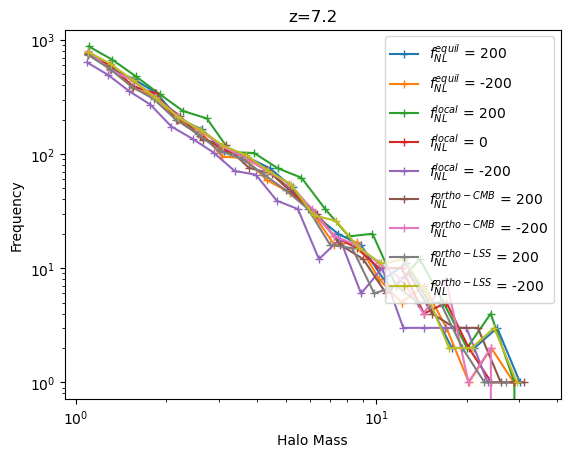

In [2]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
for snaptype in ['EQ', 'LC', 'OR_CMB', 'OR_LSS']:
    plot_hist(datadir, snaptype=snaptype, snapnum=10, parameter='Subhalo/SubhaloMass', xlabel="Halo Mass", threshold=1, num_bins=20, log=True, histtype='step')

### Star Formation Rate

[]

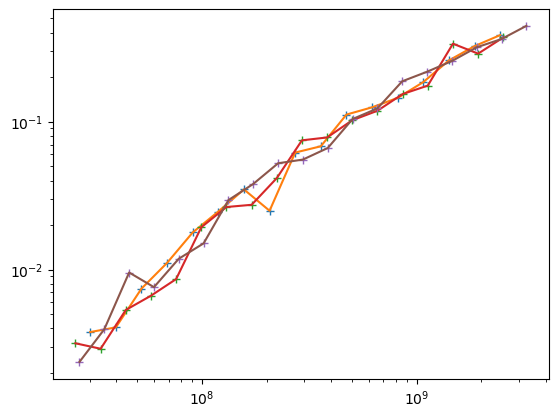

In [29]:
snapnum=90
num_bins=50
binning='log'
fNL_dict={'200':200, '0':0, 'n200':-200}
for fNL in fNL_dict:
    snapdir = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_'+fNL+'_50/'
    Stellar_mass_bins, SFR_avg, M_star, SFR_g = SFR_to_stellar_mass_relation(snapdir, snapnum=snapnum, binning=binning, num_bins=num_bins) 
    plt.plot(Stellar_mass_bins[10:-20], SFR_avg[10:-20], '+')
    plt.plot(Stellar_mass_bins[10:-20], SFR_avg[10:-20])
    
plt.loglog()


[]

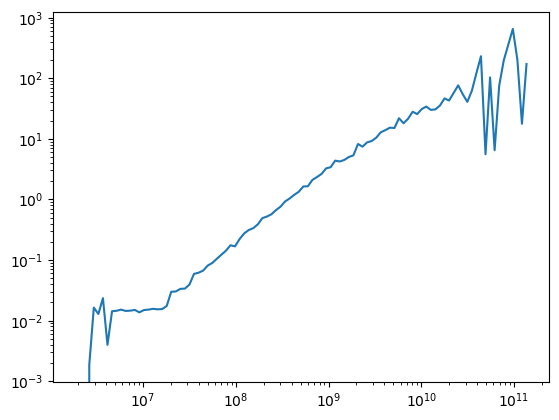

In [6]:
plt.plot(Stellar_mass_bins, SFR_avg)
plt.loglog()

### Specific Star Formation Rate

[]

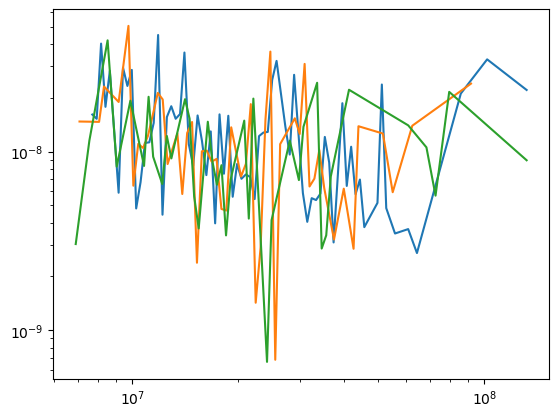

In [16]:
snapnum=3
num_bins=100
binning='log'
fNL_dict={'200':200, '0':0, 'n200':-200}
for fNL in fNL_dict:
    snapdir = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_'+fNL+'_50/'
    Stellar_mass_bins, sSFR_avg, M_star, sSFR = specific_SFR_to_stellar_mass_relation(snapdir, snapnum=snapnum, binning=binning, num_bins=num_bins) 
    plt.plot(Stellar_mass_bins, sSFR_avg)
    
plt.loglog()


[]

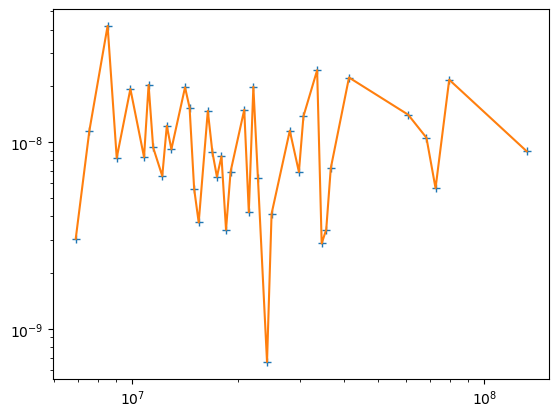

In [17]:
plt.plot(Stellar_mass_bins, sSFR_avg, '+')
plt.plot(Stellar_mass_bins, sSFR_avg)
plt.loglog()

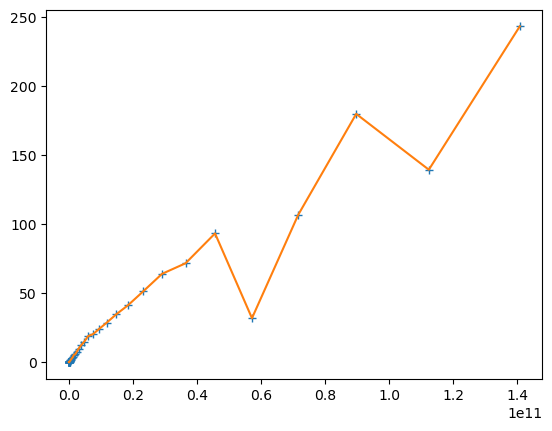

In [73]:
plt.plot(Stellar_mass_bins, SFR_avg, '+')
plt.plot(Stellar_mass_bins, SFR_avg)
# plt.semilogx()

In [94]:
# halo mass function parameters
# f_Pk   = 'Pk_linear_z=0.txt'  #file with linear Pk
OmegaM = 0.3175
Masses = M_star #array with halo masses
author = 'ST'   #Sheth-Tormen halo mass function
bins   = 443  #number of bins to use for Pk
z      = 0.0    #redshift; only used for Tinker, Tinker10 and Crocce
# delta  = 200.0  #overdensity; only for Tinker and Tinker10

# read linear matter Pk
# k, Pk = np.loadtxt(f_Pk, unpack=True)

# compute halo mass function
HMF = MFL.MF_theory(k, Pk, OmegaM, Masses, author, bins, z) #, delta)

KeyboardInterrupt: 

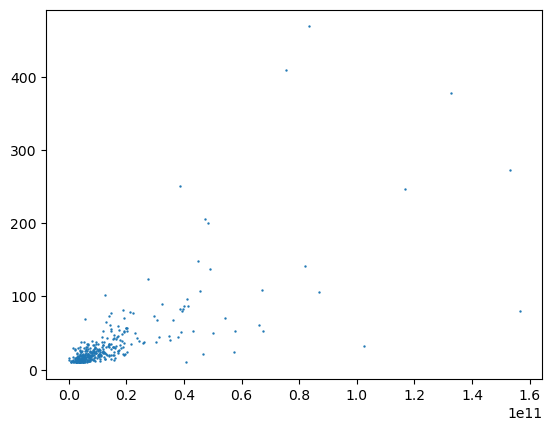

In [86]:
#plt.scatter(M_star,vmax_g, s=0.5)
#plt.scatter(M_tot, M_star, s=0.5) #stellar to halo mass relation
plt.scatter(M_star[SFR_g>10], SFR_g[SFR_g>10], s=0.5)
#plt.scatter(M_star, rad_g,s=0.5)

# Stellar to halo mass relation

In [12]:
snapnum=90
num_bins=100
binning='log'
snapdir200 = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_200_50/'
Halo_mass_bins200, Stellar_mass_avg200, _, _ = stellar_to_halo_mass_relation(snapdir200, snapnum=snapnum, binning=binning, num_bins=num_bins) 

snapdir100 = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_100_50/'
Halo_mass_bins100, Stellar_mass_avg100, _, _ = stellar_to_halo_mass_relation(snapdir100, snapnum=snapnum, binning=binning, num_bins=num_bins) 

snapdir0 = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_0_50/'
Halo_mass_bins0, Stellar_mass_avg0, _, _ = stellar_to_halo_mass_relation(snapdir0, snapnum=snapnum, binning=binning, num_bins=num_bins) 

snapdirn100 = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_n100_50/'
Halo_mass_binsn100, Stellar_mass_avgn100, _, _ = stellar_to_halo_mass_relation(snapdirn100, snapnum=snapnum, binning=binning, num_bins=num_bins) 

snapdirn200 = '/home/jovyan/TNG_L50_1P_fNL_Sims/1P_LC_n200_50/'
Halo_mass_binsn200, Stellar_mass_avgn200, _, _ = stellar_to_halo_mass_relation(snapdirn200, snapnum=snapnum, binning=binning, num_bins=num_bins) 


/home/jovyan/home/Quijote-Hydro-PNG/utils.py:191: RuntimeWarning: invalid value encountered in divide
  Stellar_mass_avg = np.bincount(index, M_star, minlength=index.max()+1)[1:]/np.bincount(index)[1:]
/home/jovyan/home/Quijote-Hydro-PNG/utils.py:188: RuntimeWarning: invalid value encountered in divide
  Stellar_mass_avg = np.bincount(index, M_star, minlength=num_bins+2)[1:-1]/np.bincount(index)[1:-1]


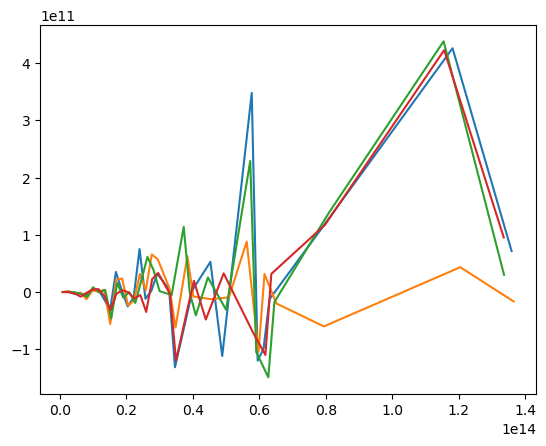

In [7]:
plt.plot(Halo_mass_bins100, Stellar_mass_avg100-Stellar_mass_avg0[:-1])
plt.plot(Halo_mass_bins200, Stellar_mass_avg200-Stellar_mass_avg0)
plt.plot(Halo_mass_binsn200, Stellar_mass_avgn200-Stellar_mass_avg0[:-1])
plt.plot(Halo_mass_binsn100, Stellar_mass_avgn100-Stellar_mass_avg0[:-1])
# plt.semilogx()

[]

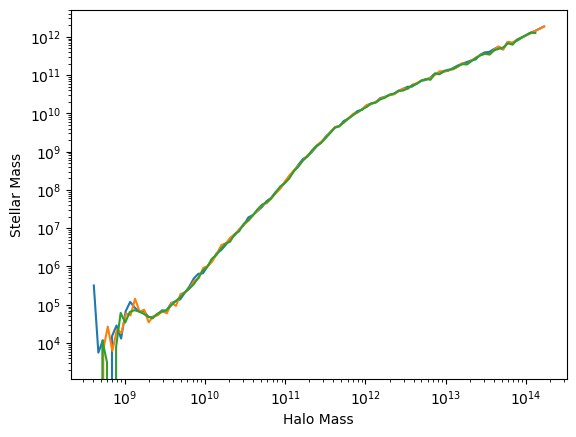

In [14]:
plt.plot(Halo_mass_bins200, Stellar_mass_avg200)
plt.plot(Halo_mass_bins0, Stellar_mass_avg0)
plt.plot(Halo_mass_binsn200, Stellar_mass_avgn200)
# plt.scatter(M_halo, M_star, s=0.5, color='orange')
# plt.errorbar(bins, Stellar_mass_avg, yerr=Stellar_mass_std, fmt='o')
plt.xlabel("Halo Mass")
plt.ylabel("Stellar Mass")
plt.loglog()

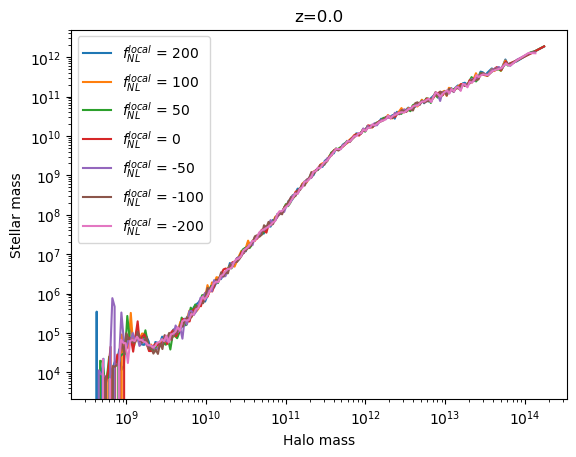

In [6]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
plot_stellar_to_halo_mass(datadir, snaptype="LC", snapnum=90, num_bins=200)

### Vmax

In [3]:
a=np.loadtxt("../times_extended.txt")[6]
z=1/a-1   
print(z)

9.002339857365174


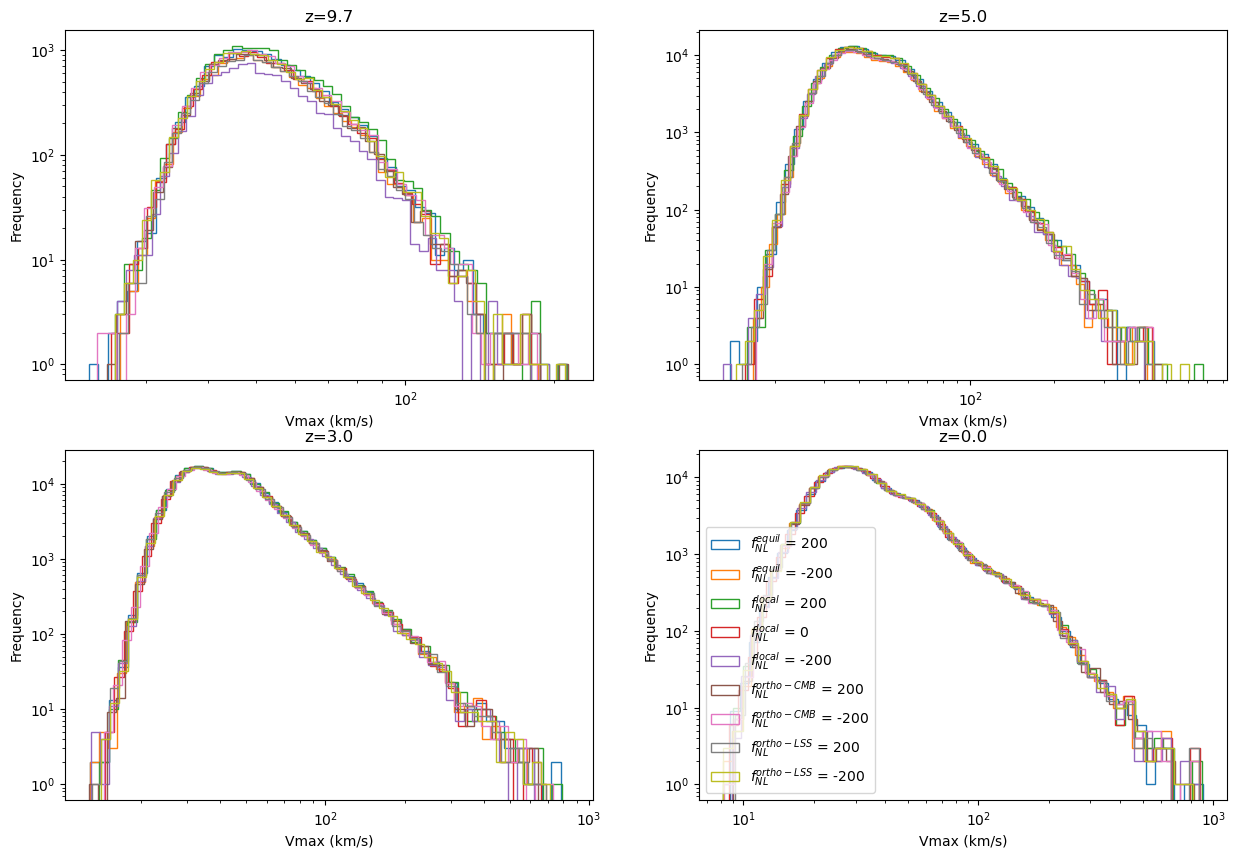

In [2]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
plot_hist_all(datadir, snaptype_list=['EQ', 'LC', 'OR_CMB', 'OR_LSS'], snapnum_list=[5, 18, 32, 90], parameter='Subhalo/SubhaloVmax', xlabel="Vmax (km/s)", num_bins=50, log=True, histtype='step')

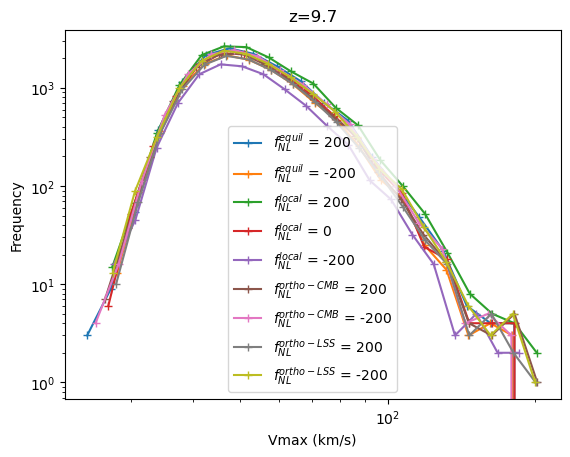

In [3]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
for snaptype in ['EQ', 'LC', 'OR_CMB', 'OR_LSS']:
    plot_hist(datadir, snaptype=snaptype, snapnum=5, parameter='Subhalo/SubhaloVmax', xlabel="Vmax (km/s)", threshold=1, num_bins=20, log=True, histtype='step')

0.06609435379505157 8.450515747070312


/home/jovyan/home/Quijote-Hydro-PNG/utils.py:517: RuntimeWarning: invalid value encountered in divide
  param_2_avg = np.bincount(index, param_2, minlength=num_bins+2)[1:-1]/np.bincount(index)[1:-1]


0.06873518973588943 7.558785915374756


TypeError: only integer scalar arrays can be converted to a scalar index

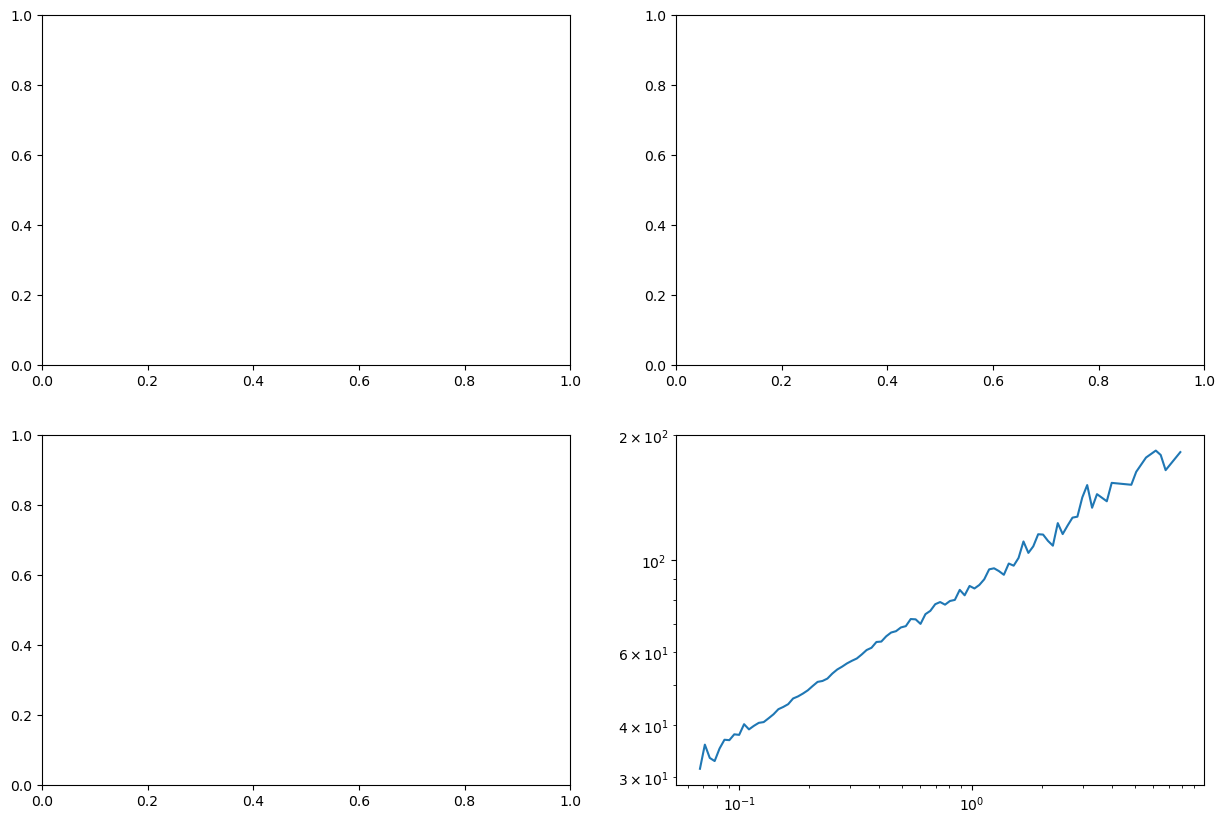

In [9]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
plot_any_relation_all(datadir, snaptype_list=['EQ', 'LC', 'OR_CMB', 'OR_LSS'], snapnum_list=[5, 18, 32, 90], parameters=['Subhalo/SubhaloMass','Subhalo/SubhaloVmax'], label=['Halo Mass $(10^{10}M_{\circ}/h)$', 'Vmax (km/s)'], binning='log', bins=100 )

### SubhaloGasMetallicity

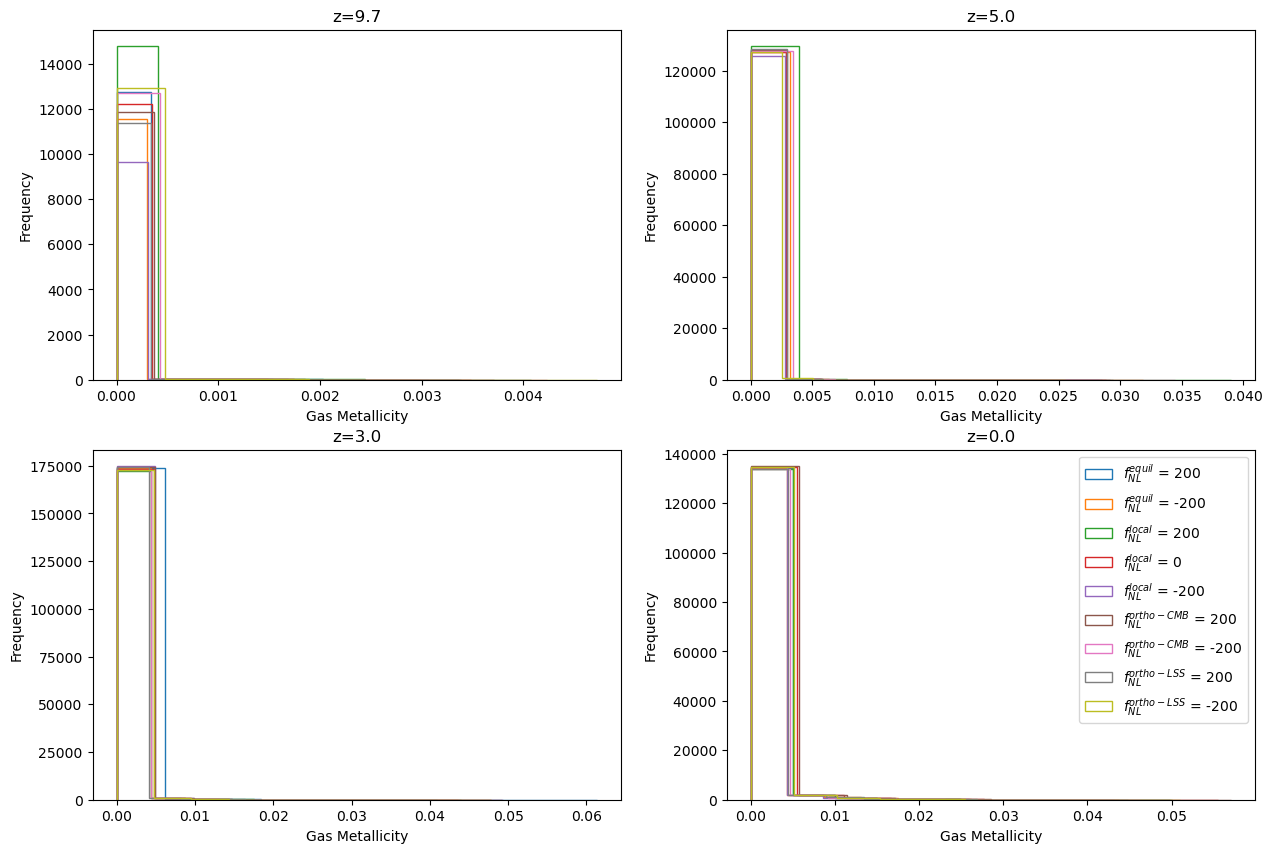

In [14]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
plot_hist_all(datadir, snaptype_list=['EQ', 'LC', 'OR_CMB', 'OR_LSS'], snapnum_list=[5, 18, 32, 90], parameter='Subhalo/SubhaloGasMetallicity', xlabel="Gas Metallicity", threshold=0, num_bins=10, log=False, histtype='step')

### SubhaloBHMass

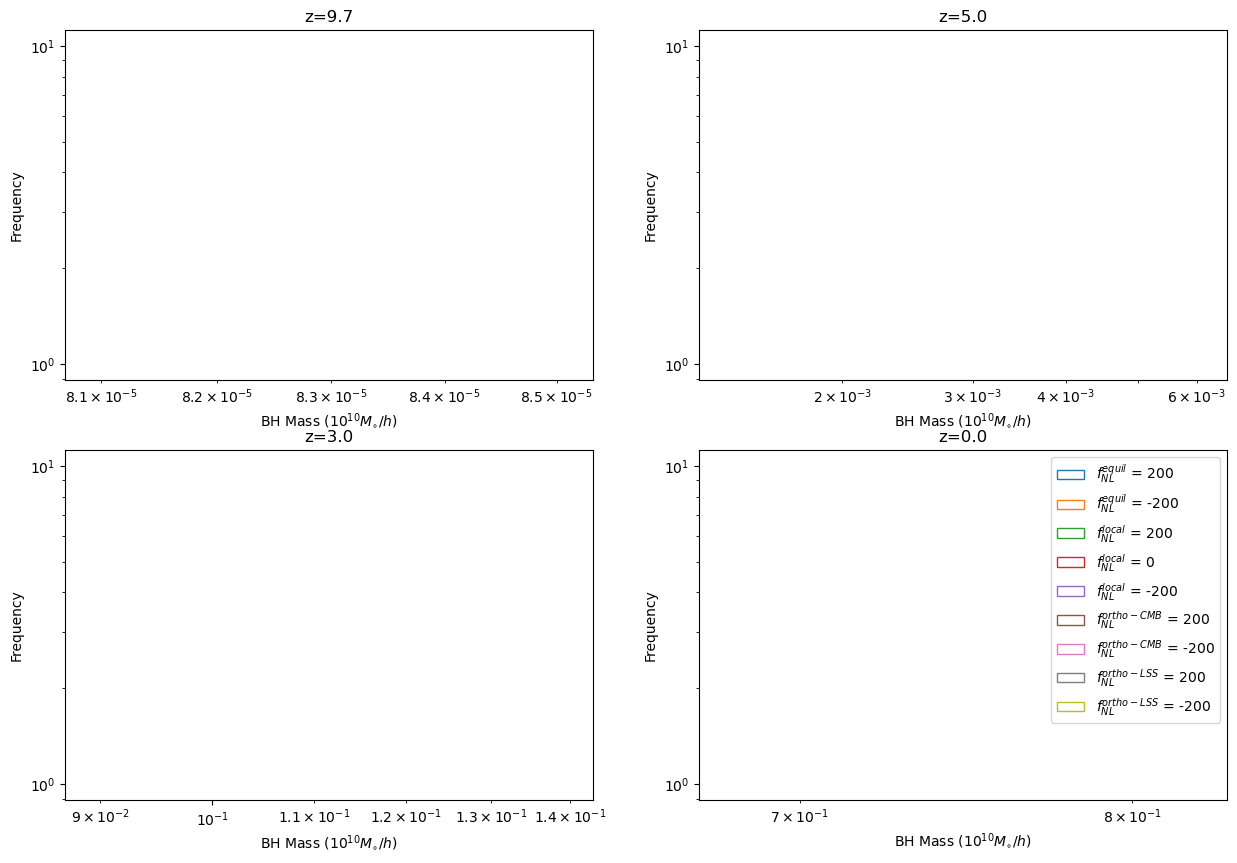

In [17]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
plot_hist_all(datadir, snaptype_list=['EQ', 'LC', 'OR_CMB', 'OR_LSS'], snapnum_list=[5, 18, 32, 90], parameter='Subhalo/SubhaloBHMass', xlabel="BH Mass $(10^{10}M_{\circ}/h)$", num_bins=50, log=True, histtype='step')

### SubhaloBHMdot

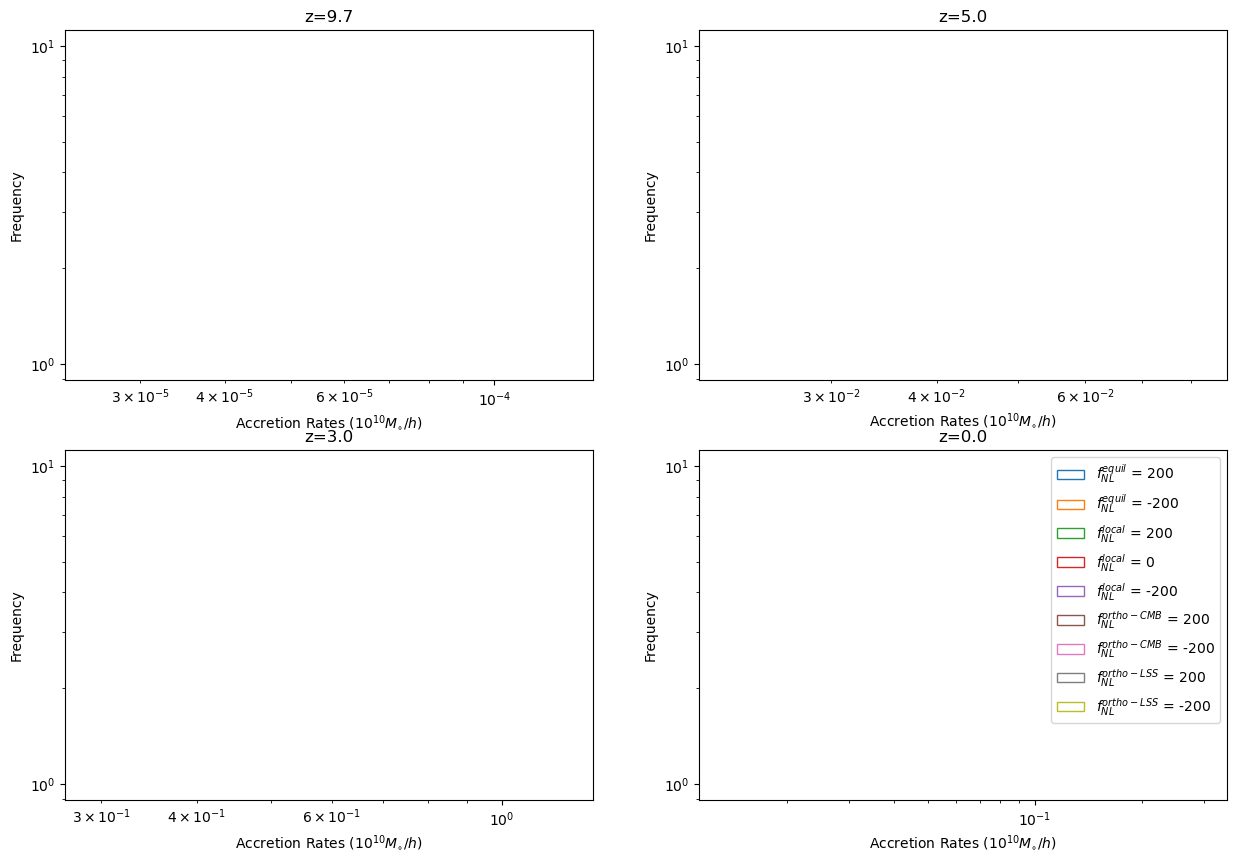

In [19]:
datadir = '/home/jovyan/TNG_L50_1P_fNL_Sims/'
plot_hist_all(datadir, snaptype_list=['EQ', 'LC', 'OR_CMB', 'OR_LSS'], snapnum_list=[5, 18, 32, 90], parameter='Subhalo/SubhaloBHMdot', xlabel="Accretion Rates $(10^{10}M_{\circ}/h)$", num_bins=50, log=True)

In [53]:
data=h5py.File(catalog, 'r')
data.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [30]:
data['Subhalo'].keys()
# data['Header'].attrs.keys()

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', '

In [111]:
(data['Subhalo']['SubhaloSpin'][()]**2).sum(1)**0.5
data['Subhalo']['SubhaloSpin'][()]

array([[-7.9590728e+03, -1.1236292e+03, -1.7219438e+04],
       [-4.6592349e+02,  1.4151138e+03,  2.3338850e+02],
       [ 9.9796820e+02,  5.2983999e+00, -2.5351607e+02],
       ...,
       [-3.0791330e+00,  3.5423608e+00,  1.5408870e+01],
       [-3.9655502e+01,  8.8794928e+00, -3.5225075e+01],
       [ 1.0129375e+01, -1.5386485e+01, -9.3229952e+00]], dtype=float32)

In [47]:
spin_hat=np.divide(spin_g,((spin_g**2).sum(1)**0.5).reshape(-1,1))


In [48]:
V=vel_g-np.multiply(np.multiply(vel_g,spin_g).sum(1).reshape(-1,1),spin_hat)
V_by_sigma=np.divide((V**2).sum(1)**0.5,vel_disp_g)

In [50]:
#V_by_sigma=np.divide((data['Subhalo']['SubhaloVel'][()]**2).sum(1)**0.5,data['Subhalo']['SubhaloVelDisp'][()])
#V_by_sigma=np.divide(data['Subhalo']['SubhaloVmax'][()],data['Subhalo']['SubhaloVelDisp'][()])

V_by_sigma=np.divide((vel_g**2).sum(1)**0.5,vel_disp_g)


In [44]:
M_star.min()

262855408.0

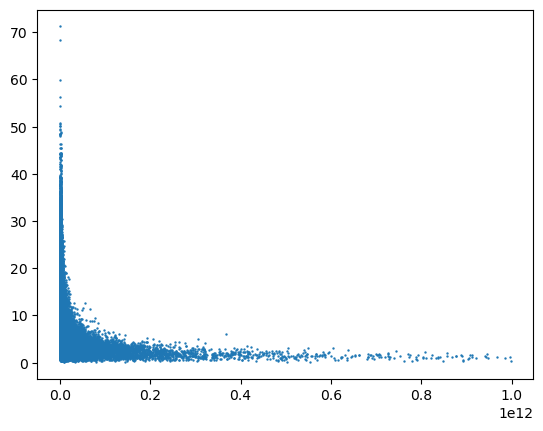

In [51]:
plt.scatter(M_star,V_by_sigma, s=0.5)

In [60]:
data['Subhalo']['SubhaloVmax'][()]

array([875.68646 , 184.84338 , 195.43628 , ...,  28.843805,  16.220346,
        23.529507], dtype=float32)

In [56]:
data['Subhalo']['SubhaloVelDisp'][()]

array([492.66525 , 102.80691 , 101.401924, ...,  14.615211,   8.963798,
        11.911139], dtype=float32)

In [109]:
data['Subhalo']['SubhaloSFR'][()]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

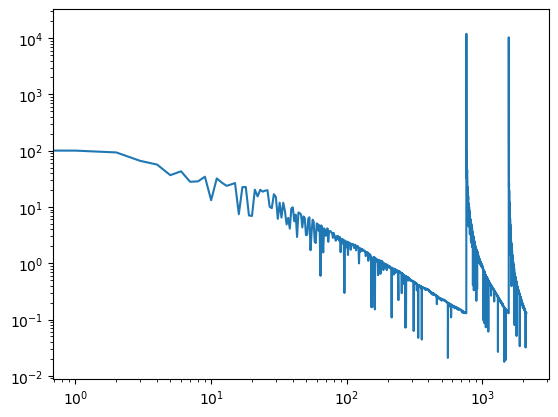

In [ ]:
plt.loglog(data['Subhalo']['SubhaloMass'][()])